In [20]:
# Import necessary modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

from dtw import *
from collections import defaultdict
from itertools import combinations, product
from pprint import pprint
from time import perf_counter

%matplotlib inline

print("> All necessary modules imported")

> All necessary modules imported


In [3]:
def _signature_properties(windows):
    """
    Compute the features (x, y, vx, vy, pressure) of the given window
    """
    signatures = []
    
    for iteration, window in enumerate(windows):
        line = window.split(" ")
        # Purpose of line[6] ? --> it removes the \n of each line
        line[6] = line[6].strip()
        
        # Get the values used to compute the features of each window        
        t, x, y, pressure = [float(val) for val in line[:4]]
        
        # If first iteration -> delta = 0
        if iteration==0:
            vx = 0.0
            vy = 0.0
        else:
            prev_t, prev_x, prev_y = previous_txy
            vx = float((x - prev_x) / (t - prev_t))
            vy = float((y - prev_y) / (t - prev_t))
            
        # Store the previous values of the time, the x and y coordinatees to compute vx, vy at next iteration
        previous_txy = (t, x, y)
        signatures.append([x, y, vx, vy, pressure])     
    return np.asarray(signatures)


def storeSignaturesFeaturesOfEachAuthor(authorsFile, allSignaturesFolder):
    """
    Store features of genuine signatures for each writer --> Each writer has 5 genuine signatures
    """
    # Open the file containing all authors and store them in a list
    with open(authorsFile, 'r') as f:
        authorsList = [line.split(" ")[0].strip()
                       for line in f.readlines()]
    
    authorSignatures = defaultdict(list)
    nb_signatures_per_author = 5
    
    # Open each signature file for all authors
    for author, i in product(authorsList, range(nb_signatures_per_author)):
        signatureList = []
        filename = f"{allSignaturesFolder}{author}-g-0{i+1}.txt"
        
        with open(filename, "r") as signature:
            
            # Get all windows of the signatures
            windows = signature.readlines()
            
            # Compute the features vector of the signature
            signatureFeatures = _signature_properties(windows)
            
            # Append the features vector to the dictionary
            authorSignatures[author].append(signatureFeatures)
            
    return authorSignatures   
                    
allGenuineSignatures = storeSignaturesFeaturesOfEachAuthor("./users.txt", "./enrollment/")
print("> All features of genuine signatures for each writer stored: " + str(allGenuineSignatures))

> The list of authors is['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030']
> All features of genuine signatures for each writer stored: defaultdict(<class 'list'>, {'001': [array([[  17.44,   80.24,    0.  ,    0.  ,   54.  ],
       [  19.11,   82.17,  167.  ,  193.  ,  146.  ],
       [  18.96,   82.41,  -15.  ,   24.  ,  314.  ],
       [  18.96,   82.49,    0.  ,    8.  ,  422.  ],
       [  18.96,   82.49,    0.  ,    0.  ,  504.  ],
       [  18.96,   82.42,    0.  ,   -7.  ,  537.  ],
       [  18.96,   82.36,    0.  ,   -6.  ,  556.  ],
       [  18.82,   82.21,  -14.  ,  -15.  ,  592.  ],
       [  18.62,   80.99,  -20.  , -122.  ,  610.  ],
       [  17.7 ,   79.08,  -92.  , -191.  ,  608.  ],
       [  16.31,   76.41, -139.  , -267.  ,  588.  ],
       [  14.61,   73.92, -170.  , -249.  ,  535.  ],
       [  13.13,   

In [4]:
def storeVerificationSignature(verificationSignaturesFolder):
    """
    Load verification data: 45 signatures per writer, 20 genuine and 25 forgeries
    """
    authorSignatures = defaultdict(list)
    
    # Open all files of the given directory
    for fileName in os.listdir(verificationSignaturesFolder):
        with open(verificationSignaturesFolder+fileName, "r") as signature:
            # Get all windows of the opened signature
            windows = signature.readlines()
        
        # Compute the features vector of the given signatures    
        signatureList = _signature_properties(windows)
        
        # Compute the k=author_name and append the features vector to the list of the chosen author
        author_name, *_ = fileName.replace(".txt", "").split("-")
        authorSignatures[author_name].append(signatureList)
        
    return authorSignatures

verificationSignatures = storeVerificationSignature("./verification/")
pprint(verificationSignatures)

    

defaultdict(<class 'list'>,
            {'001': [array([[  18.01,   15.92,    0.  ,    0.  ,  119.  ],
       [  19.62,   18.25,  161.  ,  233.  ,  170.  ],
       [  20.1 ,   18.9 ,   48.  ,   65.  ,  265.  ],
       [  20.41,   19.26,   31.  ,   36.  ,  382.  ],
       [  20.51,   19.42,   10.  ,   16.  ,  448.  ],
       [  20.51,   19.35,    0.  ,   -7.  ,  491.  ],
       [  20.36,   19.23,  -15.  ,  -12.  ,  546.  ],
       [  19.8 ,   18.24,  -56.  ,  -99.  ,  581.  ],
       [  18.77,   16.7 , -103.  , -154.  ,  589.  ],
       [  17.43,   14.51, -134.  , -219.  ,  592.  ],
       [  15.83,   12.14, -160.  , -237.  ,  595.  ],
       [  14.15,    9.66, -168.  , -248.  ,  560.  ],
       [  12.42,    7.18, -173.  , -248.  ,  544.  ],
       [  11.39,    5.78, -103.  , -140.  ,  486.  ],
       [  11.1 ,    5.1 ,  -29.  ,  -68.  ,  427.  ],
       [  11.29,    5.1 ,   19.  ,    0.  ,  418.  ],
       [  11.78,    5.71,   49.  ,   61.  ,  417.  ],
       [  13.07,    6.83,  129.  

             '002': [array([[  87.5 ,    5.52,    0.  ,    0.  ,   53.  ],
       [  87.25,    4.88,  -25.  ,  -64.  ,  301.  ],
       [  87.1 ,    4.69,  -15.  ,  -19.  ,  382.  ],
       [  87.01,    4.62,   -9.  ,   -7.  ,  469.  ],
       [  87.01,    4.62,    0.  ,    0.  ,  526.  ],
       [  87.17,    4.73,   16.  ,   11.  ,  610.  ],
       [  87.38,    4.95,   21.  ,   22.  ,  696.  ],
       [  87.68,    5.45,   30.  ,   50.  ,  754.  ],
       [  88.12,    6.14,   44.  ,   69.  ,  834.  ],
       [  88.65,    6.96,   53.  ,   82.  ,  908.  ],
       [  89.25,    8.04,   60.  ,  108.  ,  929.  ],
       [  89.79,    9.69,   54.  ,  165.  ,  947.  ],
       [  90.28,   11.72,   49.  ,  203.  ,  989.  ],
       [  90.82,   14.42,   54.  ,  270.  , 1023.  ],
       [  91.33,   16.13,   51.  ,  171.  , 1023.  ],
       [  91.6 ,   17.17,   27.  ,  104.  , 1023.  ],
       [  91.73,   17.82,   13.  ,   65.  , 1023.  ],
       [  91.73,   17.87,    0.  ,    5.  , 1023.  ],
       

                     array([[  49.98,   42.48,    0.  ,    0.  ,  815.  ],
       [  49.09,   40.64,  -89.  , -184.  ,  929.  ],
       [  48.39,   40.28,  -70.  ,  -36.  , 1023.  ],
       [  47.65,   39.88,  -74.  ,  -40.  , 1023.  ],
       [  47.46,   39.74,  -19.  ,  -14.  , 1023.  ],
       [  47.64,   39.8 ,   18.  ,    6.  , 1023.  ],
       [  48.05,   40.19,   41.  ,   39.  , 1023.  ],
       [  48.98,   41.  ,   93.  ,   81.  , 1023.  ],
       [  50.26,   42.09,  128.  ,  109.  , 1023.  ],
       [  51.58,   43.62,  132.  ,  153.  , 1023.  ],
       [  52.43,   45.15,   85.  ,  153.  , 1023.  ],
       [  52.96,   47.5 ,   53.  ,  235.  , 1023.  ],
       [  53.58,   50.4 ,   62.  ,  290.  , 1023.  ],
       [  53.86,   51.97,   28.  ,  157.  , 1023.  ],
       [  53.92,   52.89,    6.  ,   92.  , 1023.  ],
       [  53.92,   53.37,    0.  ,   48.  , 1023.  ],
       [  53.92,   53.32,    0.  ,   -5.  , 1023.  ],
       [  53.86,   52.14,   -6.  , -118.  , 1023.  ],
       

       [  77.96,   33.39,    0.  ,   -6.  ,   91.  ]]),
                     array([[ 47.64,  72.92,   0.  ,   0.  , 262.  ],
       [ 47.44,  71.94, -20.  , -98.  , 399.  ],
       [ 47.29,  72.32, -15.  ,  38.  , 512.  ],
       ...,
       [ 71.98,  79.63, -38.  , -21.  , 935.  ],
       [ 71.71,  79.33, -27.  , -30.  , 725.  ],
       [ 71.6 ,  78.98, -11.  , -35.  , 146.  ]]),
                     array([[  54.21,   68.88,    0.  ,    0.  ,  342.  ],
       [  54.21,   68.45,    0.  ,  -43.  ,  371.  ],
       [  54.35,   68.38,   14.  ,   -7.  ,  381.  ],
       ...,
       [  77.23,   67.98,    0.  ,    0.  , 1023.  ],
       [  77.23,   67.98,    0.  ,    0.  , 1023.  ],
       [  77.23,   67.98,    0.  ,    0.  ,  788.  ]]),
                     array([[ 85.14,  20.6 ,   0.  ,   0.  , 247.  ],
       [ 84.38,  19.79, -76.  , -81.  , 314.  ],
       [ 84.09,  19.5 , -29.  , -29.  , 448.  ],
       ...,
       [111.83,  30.02,   0.  ,   0.  , 932.  ],
       [111.83,  30.02,   0

             '005': [array([[  16.11,   30.42,    0.  ,    0.  ,   30.  ],
       [  16.11,   30.42,    0.  ,    0.  ,   89.  ],
       [  16.11,   30.11,    0.  ,  -31.  ,   91.  ],
       [  15.95,   30.11,  -16.  ,    0.  ,   99.  ],
       [  15.95,   30.11,    0.  ,    0.  ,  144.  ],
       [  15.95,   30.03,    0.  ,   -8.  ,  172.  ],
       [  15.95,   30.03,    0.  ,    0.  ,  188.  ],
       [  15.95,   30.03,    0.  ,    0.  ,  241.  ],
       [  16.  ,   30.16,    5.  ,   13.  ,  309.  ],
       [  16.24,   30.36,   24.  ,   20.  ,  369.  ],
       [  16.64,   30.97,   40.  ,   61.  ,  392.  ],
       [  16.95,   31.71,   31.  ,   74.  ,  425.  ],
       [  17.26,   32.54,   31.  ,   83.  ,  430.  ],
       [  17.57,   33.57,   31.  ,  103.  ,  441.  ],
       [  17.85,   34.59,   28.  ,  102.  ,  441.  ],
       [  18.12,   35.39,   27.  ,   80.  ,  441.  ],
       [  18.33,   36.05,   21.  ,   66.  ,  448.  ],
       [  18.38,   36.25,    5.  ,   20.  ,  441.  ],
       

                     array([[  94.07,   60.09,    0.  ,    0.  ,    1.  ],
       [  93.69,   59.24,  -38.  ,  -85.  ,  104.  ],
       [  93.57,   59.42,  -12.  ,   18.  ,   90.  ],
       [  93.45,   59.56,  -12.  ,   14.  ,  125.  ],
       [  93.52,   59.9 ,    7.  ,   34.  ,  177.  ],
       [  93.61,   60.38,    9.  ,   48.  ,  217.  ],
       [  93.75,   61.05,   14.  ,   67.  ,  245.  ],
       [  93.99,   61.85,   24.  ,   80.  ,  260.  ],
       [  94.33,   62.74,   34.  ,   89.  ,  270.  ],
       [  94.61,   63.67,   28.  ,   93.  ,  275.  ],
       [  94.83,   64.3 ,   22.  ,   63.  ,  279.  ],
       [  94.94,   64.72,   11.  ,   42.  ,  287.  ],
       [  94.94,   64.72,    0.  ,    0.  ,  282.  ],
       [  94.89,   64.4 ,   -5.  ,  -32.  ,  287.  ],
       [  94.73,   63.94,  -16.  ,  -46.  ,  274.  ],
       [  94.58,   63.14,  -15.  ,  -80.  ,  281.  ],
       [  94.43,   62.4 ,  -15.  ,  -74.  ,  279.  ],
       [  94.52,   61.71,    9.  ,  -69.  ,  279.  ],
       

             '008': [array([[ 95.75,  12.66,   0.  ,   0.  , 179.  ],
       [ 96.29,  12.94,  54.  ,  28.  , 208.  ],
       [ 96.35,  13.09,   6.  ,  15.  , 218.  ],
       ...,
       [110.75,  10.03,   6.  , -30.  , 516.  ],
       [110.75,   9.83,   0.  , -20.  , 516.  ],
       [110.82,   9.69,   7.  , -14.  , 371.  ]]),
                     array([[ 100.78,   10.9 ,    0.  ,    0.  ,  137.  ],
       [ 100.86,   11.39,    8.  ,   49.  ,  161.  ],
       [ 100.55,   11.76,  -31.  ,   37.  ,  228.  ],
       [  99.91,   12.06,  -64.  ,   30.  ,  277.  ],
       [  99.03,   12.28,  -88.  ,   22.  ,  333.  ],
       [  97.79,   12.46, -124.  ,   18.  ,  405.  ],
       [  96.32,   12.46, -147.  ,    0.  ,  468.  ],
       [  94.7 ,   12.08, -162.  ,  -38.  ,  529.  ],
       [  93.16,   11.54, -154.  ,  -54.  ,  543.  ],
       [  92.24,   10.92,  -92.  ,  -62.  ,  543.  ],
       [  91.74,   10.29,  -50.  ,  -63.  ,  543.  ],
       [  91.96,    9.69,   22.  ,  -60.  ,  554.  ],
  

       [  75.58,   79.24,    0.  ,  -46.  ,  106.  ]]),
                     array([[  22.12,   85.44,    0.  ,    0.  ,   32.  ],
       [  22.73,   85.74,   61.  ,   30.  ,   98.  ],
       [  22.9 ,   85.9 ,   17.  ,   16.  ,  129.  ],
       [  23.02,   86.04,   12.  ,   14.  ,  179.  ],
       [  23.15,   86.19,   13.  ,   15.  ,  220.  ],
       [  23.28,   86.32,   13.  ,   13.  ,  304.  ],
       [  23.33,   86.42,    5.  ,   10.  ,  344.  ],
       [  23.33,   86.52,    0.  ,   10.  ,  362.  ],
       [  23.25,   86.64,   -8.  ,   12.  ,  440.  ],
       [  23.18,   86.64,   -7.  ,    0.  ,  483.  ],
       [  23.09,   86.64,   -9.  ,    0.  ,  488.  ],
       [  22.74,   86.7 ,  -35.  ,    6.  ,  485.  ],
       [  22.22,   86.52,  -52.  ,  -18.  ,  481.  ],
       [  21.32,   86.29,  -90.  ,  -23.  ,  477.  ],
       [  20.41,   85.91,  -91.  ,  -38.  ,  478.  ],
       [  19.5 ,   85.46,  -91.  ,  -45.  ,  474.  ],
       [  19.08,   84.96,  -42.  ,  -50.  ,  458.  ],
     

       [ 18.9 ,  61.39,  -8.  ,  -6.  ,   1.  ]]),
                     array([[  8.64,  64.58,   0.  ,   0.  ,  63.  ],
       [  8.16,  64.42, -48.  , -16.  , 149.  ],
       [  7.91,  64.42, -25.  ,   0.  , 214.  ],
       ...,
       [ 17.28,  66.87, 387.  , 164.  , 893.  ],
       [ 22.59,  68.66, 531.  , 179.  , 827.  ],
       [ 28.85,  70.55, 626.  , 189.  , 585.  ]]),
                     array([[ 82.21,  61.73,   0.  ,   0.  , 324.  ],
       [ 81.38,  61.99, -83.  ,  26.  , 338.  ],
       [ 81.2 ,  62.17, -18.  ,  18.  , 339.  ],
       ...,
       [ 92.03,  62.18, 455.  , 177.  , 950.  ],
       [ 98.13,  64.18, 610.  , 200.  , 821.  ],
       [105.25,  66.04, 712.  , 186.  ,  91.  ]]),
                     array([[ 49.87,  72.12,   0.  ,   0.  , 119.  ],
       [ 50.02,  71.36,  15.  , -76.  , 172.  ],
       [ 49.96,  71.57,  -6.  ,  21.  , 259.  ],
       ...,
       [ 51.16,  63.05, -63.  , -47.  , 728.  ],
       [ 51.16,  62.68,   0.  , -37.  , 637.  ],
       [ 52.0

       [ 96.31,  10.72, 109.  , -11.  , 381.  ]]),
                     array([[ 36.82,  69.92,   0.  ,   0.  , 277.  ],
       [ 36.82,  69.92,   0.  ,   0.  , 379.  ],
       [ 36.82,  69.92,   0.  ,   0.  , 439.  ],
       ...,
       [ 35.31,  62.37, 266.  , -56.  , 825.  ],
       [ 36.99,  61.82, 168.  , -55.  , 697.  ],
       [ 38.05,  61.3 , 106.  , -52.  , 215.  ]]),
                     array([[ 117.47,    9.56,    0.  ,    0.  ,  392.  ],
       [ 124.55,   10.23,  708.  ,   67.  ,  279.  ],
       [ 126.99,   10.23,  244.  ,    0.  ,  393.  ],
       ...,
       [ 112.24,    0.  ,  -25.  ,    0.  , 1023.  ],
       [ 112.24,    0.  ,    0.  ,    0.  , 1023.  ],
       [ 112.52,    0.  ,   28.  ,    0.  , 1023.  ]]),
                     array([[  49.18,   16.05,    0.  ,    0.  ,  636.  ],
       [  52.  ,   14.71,  282.  , -134.  ,  647.  ],
       [  51.59,   14.63,  -41.  ,   -8.  ,  646.  ],
       ...,
       [  45.  ,    0.  ,   21.  ,    0.  ,  839.  ],
       [  45

       [  59.64,   73.26,    0.  ,   15.  ,  592.  ]]),
                     array([[  50.87,   66.98,    0.  ,    0.  ,  207.  ],
       [  51.06,   68.99,   19.  ,  201.  ,  304.  ],
       [  50.97,   69.57,   -9.  ,   58.  ,  414.  ],
       [  50.86,   69.91,  -11.  ,   34.  ,  519.  ],
       [  50.75,   69.78,  -11.  ,  -13.  ,  562.  ],
       [  50.54,   69.64,  -21.  ,  -14.  ,  578.  ],
       [  50.26,   69.11,  -28.  ,  -53.  ,  588.  ],
       [  50.02,   68.33,  -24.  ,  -78.  ,  628.  ],
       [  49.78,   66.99,  -24.  , -134.  ,  637.  ],
       [  49.78,   65.84,    0.  , -115.  ,  643.  ],
       [  49.97,   64.83,   19.  , -101.  ,  644.  ],
       [  50.12,   64.02,   15.  ,  -81.  ,  636.  ],
       [  50.43,   63.56,   31.  ,  -46.  ,  647.  ],
       [  50.84,   63.33,   41.  ,  -23.  ,  636.  ],
       [  51.23,   63.28,   39.  ,   -5.  ,  624.  ],
       [  51.76,   63.6 ,   53.  ,   32.  ,  619.  ],
       [  52.38,   64.18,   62.  ,   58.  ,  606.  ],
     

       [  51.25,   78.62, -800.  ,    0.  ,  854.  ]]),
                     array([[  69.56,   34.56,    0.  ,    0.  ,  196.  ],
       [  69.56,   34.56,    0.  ,    0.  ,  247.  ],
       [  68.93,   34.78,  -63.  ,   22.  ,  433.  ],
       [  67.96,   35.05,  -97.  ,   27.  ,  550.  ],
       [  66.02,   35.29, -194.  ,   24.  ,  670.  ],
       [  63.44,   35.29, -258.  ,    0.  ,  756.  ],
       [  59.91,   35.29, -353.  ,    0.  ,  802.  ],
       [  56.26,   34.93, -365.  ,  -36.  ,  839.  ],
       [  52.54,   34.18, -372.  ,  -75.  ,  849.  ],
       [  49.86,   33.14, -268.  , -104.  ,  863.  ],
       [  48.29,   31.92, -157.  , -122.  ,  869.  ],
       [  47.45,   30.75,  -84.  , -117.  ,  872.  ],
       [  47.75,   29.61,   30.  , -114.  ,  894.  ],
       [  49.23,   28.28,  148.  , -133.  ,  929.  ],
       [  51.49,   27.09,  226.  , -119.  ,  920.  ],
       [  55.83,   26.  ,  434.  , -109.  ,  905.  ],
       [  61.33,   25.3 ,  550.  ,  -70.  ,  905.  ],
     

                     array([[  62.06,   13.29,    0.  ,    0.  ,   54.  ],
       [  63.2 ,   14.25,  114.  ,   96.  ,   53.  ],
       [  63.2 ,   14.25,    0.  ,    0.  ,    0.  ],
       [  63.05,   15.27,  -15.  ,  102.  ,    0.  ],
       [  63.05,   15.27,    0.  ,    0.  ,   70.  ],
       [  61.48,   16.  , -157.  ,   73.  ,  139.  ],
       [  60.24,   16.1 , -124.  ,   10.  ,  213.  ],
       [  58.67,   16.1 , -157.  ,    0.  ,  279.  ],
       [  56.88,   15.79, -179.  ,  -31.  ,  325.  ],
       [  54.89,   15.23, -199.  ,  -56.  ,  371.  ],
       [  52.68,   14.48, -221.  ,  -75.  ,  399.  ],
       [  50.31,   13.33, -237.  , -115.  ,  430.  ],
       [  48.31,   12.05, -200.  , -128.  ,  441.  ],
       [  47.  ,   10.69, -131.  , -136.  ,  441.  ],
       [  46.14,    9.86,  -86.  ,  -83.  ,  433.  ],
       [  46.43,    9.17,   29.  ,  -69.  ,  440.  ],
       [  47.64,    8.58,  121.  ,  -59.  ,  443.  ],
       [  49.47,    8.09,  183.  ,  -49.  ,  446.  ],
       

             '019': [array([[  17.74,   27.95,    0.  ,    0.  ,  345.  ],
       [  15.9 ,   27.55, -184.  ,  -40.  ,  412.  ],
       [  15.3 ,   27.77,  -60.  ,   22.  ,  399.  ],
       ...,
       [  37.91,   25.86,  -19.  ,   45.  ,  641.  ],
       [  37.74,   26.03,  -17.  ,   17.  ,  595.  ],
       [  37.62,   26.03,  -12.  ,    0.  ,  398.  ]]),
                     array([[ 55.57,  32.43,   0.  ,   0.  ,  99.  ],
       [ 55.08,  32.24, -49.  , -19.  , 175.  ],
       [ 54.82,  32.14, -26.  , -10.  , 216.  ],
       ...,
       [ 57.63,  30.47, -18.  , -41.  , 407.  ],
       [ 57.47,  29.94, -16.  , -53.  , 396.  ],
       [ 57.32,  29.52, -15.  , -42.  , 222.  ]]),
                     array([[ 92.31,  13.74,   0.  ,   0.  , 158.  ],
       [ 92.01,  13.47, -30.  , -27.  , 254.  ],
       [ 92.01,  13.42,   0.  ,  -5.  , 257.  ],
       ...,
       [ 96.42,  11.79, -22.  , -61.  , 417.  ],
       [ 96.3 ,  11.35, -12.  , -44.  , 382.  ],
       [ 96.3 ,  11.06,   0.  , -2

             '021': [array([[  10.65,   22.42,    0.  ,    0.  ,   34.  ],
       [  11.43,   21.13,   78.  , -129.  ,  109.  ],
       [  11.85,   21.04,   42.  ,   -9.  ,  179.  ],
       [  12.36,   21.2 ,   51.  ,   16.  ,  226.  ],
       [  12.98,   21.81,   62.  ,   61.  ,  279.  ],
       [  13.72,   22.71,   74.  ,   90.  ,  301.  ],
       [  14.55,   24.03,   83.  ,  132.  ,  319.  ],
       [  15.5 ,   25.35,   95.  ,  132.  ,  333.  ],
       [  16.36,   26.77,   86.  ,  142.  ,  344.  ],
       [  17.16,   28.27,   80.  ,  150.  ,  344.  ],
       [  17.74,   29.76,   58.  ,  149.  ,  363.  ],
       [  18.16,   31.24,   42.  ,  148.  ,  414.  ],
       [  18.48,   32.47,   32.  ,  123.  ,  495.  ],
       [  18.6 ,   33.55,   12.  ,  108.  ,  581.  ],
       [  18.6 ,   33.97,    0.  ,   42.  ,  644.  ],
       [  18.6 ,   33.97,    0.  ,    0.  ,  658.  ],
       [  18.53,   33.75,   -7.  ,  -22.  ,  673.  ],
       [  18.53,   33.36,    0.  ,  -39.  ,  697.  ],
       

                     array([[  16.27,    6.83,    0.  ,    0.  ,   24.  ],
       [  16.54,    6.9 ,   27.  ,    7.  ,   91.  ],
       [  16.68,    7.24,   14.  ,   34.  ,  172.  ],
       [  16.85,    7.72,   17.  ,   48.  ,  240.  ],
       [  17.07,    8.42,   22.  ,   70.  ,  273.  ],
       [  17.31,    9.19,   24.  ,   77.  ,  292.  ],
       [  17.49,   10.  ,   18.  ,   81.  ,  304.  ],
       [  17.64,   10.95,   15.  ,   95.  ,  314.  ],
       [  17.79,   12.23,   15.  ,  128.  ,  304.  ],
       [  17.87,   13.72,    8.  ,  149.  ,  338.  ],
       [  17.87,   14.73,    0.  ,  101.  ,  407.  ],
       [  17.87,   15.27,    0.  ,   54.  ,  440.  ],
       [  17.77,   15.49,  -10.  ,   22.  ,  458.  ],
       [  17.66,   15.49,  -11.  ,    0.  ,  447.  ],
       [  17.66,   15.13,    0.  ,  -36.  ,  448.  ],
       [  17.66,   14.61,    0.  ,  -52.  ,  468.  ],
       [  17.66,   13.54,    0.  , -107.  ,  494.  ],
       [  17.66,   12.19,    0.  , -135.  ,  512.  ],
       

             '022': [array([[ 106.72,   49.36,    0.  ,    0.  ,   89.  ],
       [ 106.72,   49.36,    0.  ,    0.  ,  155.  ],
       [ 106.72,   49.36,    0.  ,    0.  ,  247.  ],
       [ 106.72,   49.36,    0.  ,    0.  ,  335.  ],
       [ 106.72,   49.36,    0.  ,    0.  ,  420.  ],
       [ 106.72,   49.36,    0.  ,    0.  ,  498.  ],
       [ 106.72,   49.36,    0.  ,    0.  ,  542.  ],
       [ 106.72,   49.36,    0.  ,    0.  ,  591.  ],
       [ 106.72,   49.36,    0.  ,    0.  ,  636.  ],
       [ 106.67,   49.41,   -5.  ,    5.  ,  659.  ],
       [ 106.67,   49.5 ,    0.  ,    9.  ,  673.  ],
       [ 106.67,   49.58,    0.  ,    8.  ,  694.  ],
       [ 106.6 ,   49.73,   -7.  ,   15.  ,  727.  ],
       [ 106.53,   49.89,   -7.  ,   16.  ,  745.  ],
       [ 106.46,   50.06,   -7.  ,   17.  ,  773.  ],
       [ 106.4 ,   50.3 ,   -6.  ,   24.  ,  782.  ],
       [ 106.26,   50.58,  -14.  ,   28.  ,  797.  ],
       [ 106.07,   50.87,  -19.  ,   29.  ,  808.  ],
       

       [  38.62,   46.95,  -25.  ,  -30.  ,   89.  ]]),
                     array([[ 69.11,  53.47,   0.  ,   0.  ,  67.  ],
       [ 69.11,  53.47,   0.  ,   0.  , 122.  ],
       [ 69.11,  53.47,   0.  ,   0.  , 207.  ],
       ...,
       [ 73.  ,  47.51, 441.  ,  44.  , 937.  ],
       [ 76.74,  47.93, 374.  ,  42.  , 823.  ],
       [ 80.13,  48.08, 339.  ,  15.  , 530.  ]]),
                     array([[ 108.16,   65.45,    0.  ,    0.  ,   30.  ],
       [ 108.16,   65.45,    0.  ,    0.  ,   46.  ],
       [ 108.16,   65.45,    0.  ,    0.  ,   32.  ],
       [ 108.16,   65.45,    0.  ,    0.  ,   27.  ],
       [ 108.43,   65.71,   27.  ,   26.  ,   41.  ],
       [ 108.49,   65.78,    6.  ,    7.  ,   98.  ],
       [ 108.49,   65.78,    0.  ,    0.  ,  161.  ],
       [ 108.49,   65.78,    0.  ,    0.  ,  240.  ],
       [ 108.49,   65.78,    0.  ,    0.  ,  310.  ],
       [ 108.49,   65.78,    0.  ,    0.  ,  398.  ],
       [ 108.49,   65.78,    0.  ,    0.  ,  481.  ],


       [ 106.75,   10.51,  366.  ,  -31.  ,  477.  ]]),
                     array([[  36.53,   62.01,    0.  ,    0.  ,  216.  ],
       [  36.69,   62.62,   16.  ,   61.  ,  292.  ],
       [  36.63,   63.03,   -6.  ,   41.  ,  404.  ],
       [  36.46,   63.46,  -17.  ,   43.  ,  448.  ],
       [  36.07,   64.01,  -39.  ,   55.  ,  467.  ],
       [  35.52,   64.74,  -55.  ,   73.  ,  495.  ],
       [  34.69,   65.58,  -83.  ,   84.  ,  492.  ],
       [  33.45,   66.38, -124.  ,   80.  ,  496.  ],
       [  31.93,   67.15, -152.  ,   77.  ,  481.  ],
       [  29.65,   67.85, -228.  ,   70.  ,  468.  ],
       [  26.62,   68.23, -303.  ,   38.  ,  456.  ],
       [  23.08,   68.42, -354.  ,   19.  ,  514.  ],
       [  18.9 ,   68.18, -418.  ,  -24.  ,  567.  ],
       [  15.  ,   67.59, -390.  ,  -59.  ,  595.  ],
       [  11.28,   66.76, -372.  ,  -83.  ,  641.  ],
       [   7.81,   65.69, -347.  , -107.  ,  673.  ],
       [   5.25,   64.54, -256.  , -115.  ,  678.  ],
     

             '023': [array([[  61.43,   31.12,    0.  ,    0.  ,   48.  ],
       [  61.55,   31.49,   12.  ,   37.  ,  441.  ],
       [  61.55,   31.58,    0.  ,    9.  ,  517.  ],
       [  61.43,   31.58,  -12.  ,    0.  ,  557.  ],
       [  61.43,   31.46,    0.  ,  -12.  ,  634.  ],
       [  61.43,   31.06,    0.  ,  -40.  ,  693.  ],
       [  61.43,   30.45,    0.  ,  -61.  ,  757.  ],
       [  61.43,   29.52,    0.  ,  -93.  ,  829.  ],
       [  61.33,   28.3 ,  -10.  , -122.  ,  860.  ],
       [  61.25,   26.9 ,   -8.  , -140.  ,  905.  ],
       [  61.25,   25.85,    0.  , -105.  ,  940.  ],
       [  61.25,   25.01,    0.  ,  -84.  ,  971.  ],
       [  61.25,   24.32,    0.  ,  -69.  ,  986.  ],
       [  61.3 ,   23.78,    5.  ,  -54.  ,  994.  ],
       [  61.3 ,   23.38,    0.  ,  -40.  ,  977.  ],
       [  61.3 ,   23.07,    0.  ,  -31.  ,  981.  ],
       [  61.3 ,   22.96,    0.  ,  -11.  ,  988.  ],
       [  61.3 ,   22.96,    0.  ,    0.  ,  996.  ],
       

                     array([[  64.3 ,   74.56,    0.  ,    0.  ,  139.  ],
       [  64.3 ,   74.56,    0.  ,    0.  ,  175.  ],
       [  64.3 ,   74.56,    0.  ,    0.  ,  190.  ],
       [  63.87,   74.06,  -43.  ,  -50.  ,  212.  ],
       [  63.73,   73.71,  -14.  ,  -35.  ,  242.  ],
       [  63.73,   73.41,    0.  ,  -30.  ,  281.  ],
       [  63.9 ,   72.82,   17.  ,  -59.  ,  315.  ],
       [  64.07,   72.05,   17.  ,  -77.  ,  371.  ],
       [  64.27,   70.66,   20.  , -139.  ,  391.  ],
       [  64.55,   68.75,   28.  , -191.  ,  387.  ],
       [  64.55,   66.49,    0.  , -226.  ,  389.  ],
       [  64.47,   64.32,   -8.  , -217.  ,  394.  ],
       [  64.31,   62.51,  -16.  , -181.  ,  444.  ],
       [  64.11,   60.94,  -20.  , -157.  ,  477.  ],
       [  63.88,   59.97,  -23.  ,  -97.  ,  494.  ],
       [  63.71,   59.42,  -17.  ,  -55.  ,  512.  ],
       [  63.71,   59.15,    0.  ,  -27.  ,  517.  ],
       [  63.76,   59.15,    5.  ,    0.  ,  519.  ],
       

       [ 36.96,  40.83, 295.  , 175.  , 247.  ]]),
                     array([[ 87.58,   8.11,   0.  ,   0.  , 160.  ],
       [ 87.28,   7.69, -30.  , -42.  , 247.  ],
       [ 87.14,   7.63, -14.  ,  -6.  , 297.  ],
       ...,
       [101.54,   8.51, 271.  ,  36.  , 668.  ],
       [103.55,   8.84, 201.  ,  33.  , 543.  ],
       [104.74,   9.09, 119.  ,  25.  , 233.  ]]),
                     array([[  90.15,   24.37,    0.  ,    0.  ,  131.  ],
       [  89.93,   23.59,  -22.  ,  -78.  ,  218.  ],
       [  89.84,   23.28,   -9.  ,  -31.  ,  281.  ],
       [  89.84,   23.12,    0.  ,  -16.  ,  345.  ],
       [  89.84,   23.07,    0.  ,   -5.  ,  418.  ],
       [  89.9 ,   23.07,    6.  ,    0.  ,  501.  ],
       [  89.95,   23.13,    5.  ,    6.  ,  592.  ],
       [  90.04,   23.21,    9.  ,    8.  ,  684.  ],
       [  90.18,   23.46,   14.  ,   25.  ,  758.  ],
       [  90.43,   24.17,   25.  ,   71.  ,  797.  ],
       [  90.77,   25.19,   34.  ,  102.  ,  827.  ],
     

             '025': [array([[ 91.55,  88.65,   0.  ,   0.  , 400.  ],
       [ 91.55,  88.65,   0.  ,   0.  , 450.  ],
       [ 91.55,  88.65,   0.  ,   0.  , 453.  ],
       ...,
       [107.7 ,  80.76, -11.  ,   8.  , 546.  ],
       [108.19,  80.61,  49.  , -15.  , 537.  ],
       [109.09,  80.79,  90.  ,  18.  , 101.  ]]),
                     array([[ 95.9 ,  55.26,   0.  ,   0.  , 561.  ],
       [ 96.43,  55.88,  53.  ,  62.  , 643.  ],
       [ 96.28,  55.63, -15.  , -25.  , 790.  ],
       ...,
       [112.76,  53.06,  31.  ,  72.  , 805.  ],
       [112.86,  53.06,  10.  ,   0.  , 808.  ],
       [112.86,  52.96,   0.  , -10.  , 727.  ]]),
                     array([[ 51.03,  31.87,   0.  ,   0.  , 165.  ],
       [ 50.86,  32.6 , -17.  ,  73.  , 205.  ],
       [ 50.69,  32.6 , -17.  ,   0.  , 208.  ],
       ...,
       [ 65.68,  24.72, 111.  ,   6.  , 896.  ],
       [ 67.32,  24.78, 164.  ,   6.  , 834.  ],
       [ 68.99,  24.86, 167.  ,   8.  , 449.  ]]),
             

             '027': [array([[ 48.05,   9.59,   0.  ,   0.  ,  94.  ],
       [ 47.66,   9.48, -39.  , -11.  , 109.  ],
       [ 47.57,   9.48,  -9.  ,   0.  , 151.  ],
       ...,
       [ 76.28,  16.59, 170.  , 164.  , 594.  ],
       [ 78.22,  18.17, 194.  , 158.  , 572.  ],
       [ 80.33,  19.42, 211.  , 125.  , 447.  ]]),
                     array([[  48.52,   62.12,    0.  ,    0.  ,   18.  ],
       [  48.2 ,   62.36,  -32.  ,   24.  ,   53.  ],
       [  48.27,   63.  ,    7.  ,   64.  ,   96.  ],
       [  48.61,   63.87,   34.  ,   87.  ,  185.  ],
       [  49.11,   64.94,   50.  ,  107.  ,  269.  ],
       [  49.72,   66.01,   61.  ,  107.  ,  327.  ],
       [  50.52,   66.96,   80.  ,   95.  ,  349.  ],
       [  51.35,   67.83,   83.  ,   87.  ,  359.  ],
       [  52.  ,   68.46,   65.  ,   63.  ,  358.  ],
       [  52.52,   68.79,   52.  ,   33.  ,  330.  ],
       [  53.04,   68.91,   52.  ,   12.  ,  287.  ],
       [  53.2 ,   68.61,   16.  ,  -30.  ,  272.  ],
  

       [  41.2 ,   83.57,  152.  ,   33.  ,   93.  ]]),
                     array([[  55.02,   35.11,    0.  ,    0.  ,   47.  ],
       [  55.69,   36.27,   67.  ,  116.  ,  108.  ],
       [  56.35,   36.95,   66.  ,   68.  ,  117.  ],
       [  57.18,   37.62,   83.  ,   67.  ,  175.  ],
       [  58.35,   38.28,  117.  ,   66.  ,  253.  ],
       [  59.43,   38.45,  108.  ,   17.  ,  315.  ],
       [  60.46,   38.05,  103.  ,  -40.  ,  387.  ],
       [  61.36,   37.28,   90.  ,  -77.  ,  423.  ],
       [  61.9 ,   36.22,   54.  , -106.  ,  464.  ],
       [  62.2 ,   34.93,   30.  , -129.  ,  520.  ],
       [  62.2 ,   33.5 ,    0.  , -143.  ,  546.  ],
       [  61.87,   32.07,  -33.  , -143.  ,  561.  ],
       [  61.4 ,   30.8 ,  -47.  , -127.  ,  586.  ],
       [  60.85,   29.64,  -55.  , -116.  ,  591.  ],
       [  60.32,   28.81,  -53.  ,  -83.  ,  599.  ],
       [  59.8 ,   28.42,  -52.  ,  -39.  ,  613.  ],
       [  59.5 ,   28.32,  -30.  ,  -10.  ,  586.  ],
     

             '028': [array([[  80.66,    4.18,    0.  ,    0.  ,  751.  ],
       [  82.06,    2.55,  140.  , -163.  ,  725.  ],
       [  82.35,    2.62,   29.  ,    7.  ,  649.  ],
       [  83.77,    2.62,  142.  ,    0.  ,  662.  ],
       [  85.5 ,    3.73,  173.  ,  111.  ,  690.  ],
       [  87.43,    5.64,  193.  ,  191.  ,  749.  ],
       [  89.51,    8.34,  208.  ,  270.  ,  768.  ],
       [  91.44,   11.08,  193.  ,  274.  ,  780.  ],
       [  93.26,   14.5 ,  182.  ,  342.  ,  777.  ],
       [  94.77,   18.36,  151.  ,  386.  ,  753.  ],
       [  95.43,   21.69,   66.  ,  333.  ,  765.  ],
       [  95.53,   23.58,   10.  ,  189.  ,  785.  ],
       [  95.12,   24.51,  -41.  ,   93.  ,  788.  ],
       [  93.86,   24.42, -126.  ,   -9.  ,  819.  ],
       [  92.02,   23.06, -184.  , -136.  ,  824.  ],
       [  89.94,   20.85, -208.  , -221.  ,  875.  ],
       [  88.07,   17.57, -187.  , -328.  ,  900.  ],
       [  86.35,   14.22, -172.  , -335.  ,  924.  ],
       

       [  65.84,   66.93,   73.  ,   19.  ,  302.  ]]),
                     array([[  94.71,   17.14,    0.  ,    0.  ,  314.  ],
       [  93.45,   16.79, -126.  ,  -35.  ,  304.  ],
       [  93.39,   16.89,   -6.  ,   10.  ,  265.  ],
       [  93.7 ,   16.78,   31.  ,  -11.  ,  274.  ],
       [  94.25,   16.57,   55.  ,  -21.  ,  296.  ],
       [  95.32,   16.3 ,  107.  ,  -27.  ,  319.  ],
       [  96.89,   16.16,  157.  ,  -14.  ,  343.  ],
       [  98.8 ,   16.07,  191.  ,   -9.  ,  359.  ],
       [ 101.09,   16.02,  229.  ,   -5.  ,  387.  ],
       [ 103.39,   16.02,  230.  ,    0.  ,  366.  ],
       [ 105.36,   16.07,  197.  ,    5.  ,  366.  ],
       [ 107.11,   16.19,  175.  ,   12.  ,  349.  ],
       [ 107.95,   16.02,   84.  ,  -17.  ,  338.  ],
       [ 108.2 ,   15.71,   25.  ,  -31.  ,  341.  ],
       [ 108.05,   15.3 ,  -15.  ,  -41.  ,  359.  ],
       [ 107.5 ,   14.75,  -55.  ,  -55.  ,  382.  ],
       [ 106.55,   14.15,  -95.  ,  -60.  ,  422.  ],
     

In [71]:
# Compute the average distance between all genuine signatures for each writer
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from itertools import combinations

def _normalize_size(signature, diff):
    """
    Add zeros at the end of the given signature. Used to normalize
    the signature size for the mean distance computation.
    """
    extra_zeros = np.zeros((np.abs(diff), 5))
    
    return np.concatenate((signature, extra_zeros), axis=0)

def _compute_dist(signature_a, signature_b):
    """
    Compute the DTW distance
    """
    diff_length = len(signature_a) - len(signature_b)
            
    if diff_length > 0:
        signature_b = _normalize_size(signature_b, diff_length)
    elif diff_length < 0:
        signature_a = _normalize_size(signature_a, diff_length)
    
    dist = sakoeChibaDTW(signature_a, signature_b, 50)
    
    return dist

def meanDistance(allGenuineSignatures):
    """
    Compute the mean distance between all genuine signature of each author
    """
    meanDistanceForEachAuthor = {}
    for author, signatures in allGenuineSignatures.items():
        allDistances = [_compute_dist(sign_a, sign_b)
                        for sign_a, sign_b
                        in combinations(signatures, 2)]
        
        meanDistanceForEachAuthor[author] = np.mean(allDistances)
    return meanDistanceForEachAuthor

meanDistanceForEachAuthor = meanDistance(allGenuineSignatures)
print(meanDistanceForEachAuthor)


    
            


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'001': 10291.0319430706, '002': 31040.25939789565, '003': 58234.67920195849, '004': 51863.19784964516, '005': 14952.006372824766, '006': 59077.86780340703, '007': 35216.39718107347, '008': 27993.64304814908, '009': 72525.32695085031, '010': 25960.85205619578, '011': 103528.5296336622, '012': 45093.40694700535, '013': 46295.29889202774, '014': 44666.49245754634, '015': 21023.360779487248, '016': 6811.318045869242, '017': 12202.219037818943, '018': 36459.620538208386, '019': 22416.07846456411, '020': 51811.861642639706, '021': 15618.739790077088, '022': 10244.834990184634, '023': 9712.863326829396, '024': 32347.779528631374, '025': 74787.49104258246, '026': 68497.0179697801, '027': 13815.105337777928, '028': 32235.5000880725, '029': 10850.830050801515, '030': 60592.88146939767}


In [31]:
def computeAllDistance(genuineSignatures, testSignatures):
    """
    Compute the mean distance between to all genuine signatures for each test signature of each author
    """
    
    # dictionary {author:[meanTestSignature1WithAllGenuine, meanTestSignature2WithAllGenuine, ...]}
    # Important: the order in the list corresponds to signature1, signature 2, signature3, etc..
    meanPerTestSignature = {}
    for author in testSignatures.keys():
        print("Start author")
        meanPerTestSignature[author] = []
        for index, testSignature in enumerate(testSignatures[author]):
            print("testSignature", index)
            dists = []
            
            # Compute the distance from one test signature to the 5 genuine of the author
            for genuineSignature in genuineSignatures[author]:
                dists.append(sakoeChibaDTW(testSignature, genuineSignature, 50))
                
            # Compute the mean distance
            meanDist = np.mean(dists)
            meanPerTestSignature[author].append(meanDist)        
        print("One author done")

    return meanPerTestSignature
            
        
allMeanDistances = computeAllDistance(allGenuineSignatures, verificationSignatures)
print(allMeanDistances)
            
        

Start author
testSignature 0
testSignature 1
testSignature 2
testSignature 3
testSignature 4
testSignature 5
testSignature 6
testSignature 7
testSignature 8
testSignature 9
testSignature 10
testSignature 11
testSignature 12
testSignature 13
testSignature 14
testSignature 15
testSignature 16
testSignature 17
testSignature 18
testSignature 19
testSignature 20
testSignature 21
testSignature 22
testSignature 23
testSignature 24
testSignature 25
testSignature 26
testSignature 27
testSignature 28
testSignature 29
testSignature 30
testSignature 31
testSignature 32
testSignature 33
testSignature 34
testSignature 35
testSignature 36
testSignature 37
testSignature 38
testSignature 39
testSignature 40
testSignature 41
testSignature 42
testSignature 43
testSignature 44
One author done
Start author
testSignature 0
testSignature 1
testSignature 2
testSignature 3
testSignature 4
testSignature 5
testSignature 6
testSignature 7
testSignature 8
testSignature 9
testSignature 10
testSignature 11
testSigna

testSignature 21
testSignature 22
testSignature 23
testSignature 24
testSignature 25
testSignature 26
testSignature 27
testSignature 28
testSignature 29
testSignature 30
testSignature 31
testSignature 32
testSignature 33
testSignature 34
testSignature 35
testSignature 36
testSignature 37
testSignature 38
testSignature 39
testSignature 40
testSignature 41
testSignature 42
testSignature 43
testSignature 44
One author done
Start author
testSignature 0
testSignature 1
testSignature 2
testSignature 3
testSignature 4
testSignature 5
testSignature 6
testSignature 7
testSignature 8
testSignature 9
testSignature 10
testSignature 11
testSignature 12
testSignature 13
testSignature 14
testSignature 15
testSignature 16
testSignature 17
testSignature 18
testSignature 19
testSignature 20
testSignature 21
testSignature 22
testSignature 23
testSignature 24
testSignature 25
testSignature 26
testSignature 27
testSignature 28
testSignature 29
testSignature 30
testSignature 31
testSignature 32
testSignatur

testSignature 42
testSignature 43
testSignature 44
One author done
Start author
testSignature 0
testSignature 1
testSignature 2
testSignature 3
testSignature 4
testSignature 5
testSignature 6
testSignature 7
testSignature 8
testSignature 9
testSignature 10
testSignature 11
testSignature 12
testSignature 13
testSignature 14
testSignature 15
testSignature 16
testSignature 17
testSignature 18
testSignature 19
testSignature 20
testSignature 21
testSignature 22
testSignature 23
testSignature 24
testSignature 25
testSignature 26
testSignature 27
testSignature 28
testSignature 29
testSignature 30
testSignature 31
testSignature 32
testSignature 33
testSignature 34
testSignature 35
testSignature 36
testSignature 37
testSignature 38
testSignature 39
testSignature 40
testSignature 41
testSignature 42
testSignature 43
testSignature 44
One author done
Start author
testSignature 0
testSignature 1
testSignature 2
testSignature 3
testSignature 4
testSignature 5
testSignature 6
testSignature 7
testSign

In [ ]:
import pickle

def save_obj(obj, name ):
    """
    Save the given object in a file
    """
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
savedData = save_obj(allMeanDistances,"testSignatures")


In [79]:
def load_obj(name ):
    """
    Retrieve the object contained in the given file
    """
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
data = load_obj("testSignatures")

In [80]:
def predict(testSignatures):
    """
    Predict the class of all verification signature
    """
    thresholds = [i for i in range(0, 50000, 50)]
    prediction = {}
    for threshold in thresholds:
        prediction[threshold]={}
        for author in testSignatures.keys():
            for index,signature in enumerate(testSignatures[author]):
                if abs(signature-meanDistanceForEachAuthor[author])<threshold:
                    if index<9:
                        prediction[threshold][str(author)+"-0"+str(index+1)]='g'
                    else:
                        prediction[threshold][str(author)+"-"+str(index+1)]='g'
                else:
                    if index<9:
                        prediction[threshold][str(author)+"-0"+str(index+1)]='f'
                    else:
                        prediction[threshold][str(author)+"-"+str(index+1)]='f'
    return prediction

allPredictions = predict(data)

    
    

In [81]:
def evaluate(allPredictions):
    """
    Compute the accuracy of the algorithm using the ground truth
    """
    groundTruth = {}
    accuracy = {}
    with open("gt.txt", "r") as myfile:
        lines = myfile.readlines()
        for l in lines:
            a = l.replace("\n", "").split(" ")
            groundTruth[a[0]] = a[1]
        
    for threshold in allPredictions.keys():
        correct = 0
        wrong = 0
        for signature in allPredictions[threshold].keys():
            if groundTruth[signature]==allPredictions[threshold][signature]:
                correct+=1
            else:
                wrong+=1
        accuracy[threshold]= correct/(correct+wrong)
    return accuracy

accuracyList = evaluate(allPredictions)
print(accuracyList)
        

{0: 0.5555555555555556, 50: 0.5585185185185185, 100: 0.5592592592592592, 150: 0.56, 200: 0.5607407407407408, 250: 0.5622222222222222, 300: 0.5614814814814815, 350: 0.5622222222222222, 400: 0.5637037037037037, 450: 0.5651851851851852, 500: 0.5666666666666667, 550: 0.5688888888888889, 600: 0.5718518518518518, 650: 0.5748148148148148, 700: 0.5792592592592593, 750: 0.5792592592592593, 800: 0.577037037037037, 850: 0.5814814814814815, 900: 0.582962962962963, 950: 0.5844444444444444, 1000: 0.5851851851851851, 1050: 0.5881481481481482, 1100: 0.5911111111111111, 1150: 0.5940740740740741, 1200: 0.5955555555555555, 1250: 0.5955555555555555, 1300: 0.5985185185185186, 1350: 0.5992592592592593, 1400: 0.6007407407407407, 1450: 0.6022222222222222, 1500: 0.6074074074074074, 1550: 0.6081481481481481, 1600: 0.6103703703703703, 1650: 0.6133333333333333, 1700: 0.6148148148148148, 1750: 0.6162962962962963, 1800: 0.6177777777777778, 1850: 0.6192592592592593, 1900: 0.6192592592592593, 1950: 0.6207407407407407

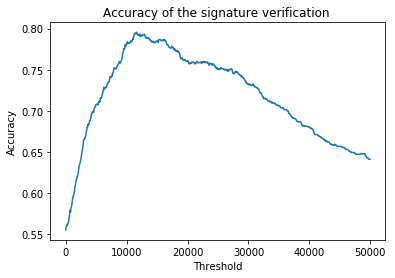

In [84]:
def visualize(accuracy):
    lists = sorted(accuracy.items()) 
    x, y = zip(*lists)
    plt.plot(x, y)
    plt.title("Accuracy of the signature verification ")
    plt.xlabel("Threshold")
    plt.ylabel("Accuracy")
    plt.show()
visualize(accuracyList)